In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix
from scipy.stats import t

# Enable LaTeX rendering
from matplotlib import rc
rc('text', usetex=True)
plt.rc('font', family='sans-serif', size=7)
plt.rc('font',**{'sans-serif':['Helvetica']})
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 0.75  

In [2]:
# Load the CSV file, skipping the first column
data = pd.read_csv('../data/revasc_mimic_test_predictions.csv', index_col=0)
data

,FallNR,y_true,proba_run0,proba_run1,proba_run2,proba_run3,proba_run4,proba_run5,proba_run6,proba_run7,proba_run8,proba_run9
0,2,0,0.007051,0.002762,0.001492,0.001650,0.007529,0.002564,0.002707,0.001409,0.002147,0.002689
1,4,0,0.000267,0.000280,0.000149,0.000250,0.000296,0.000134,0.000221,0.000356,0.000176,0.000515
2,6,0,0.001105,0.000265,0.000194,0.000800,0.001055,0.000216,0.000382,0.000459,0.001177,0.000401
3,29,0,0.000235,0.000106,0.000115,0.000193,0.000064,0.000048,0.000109,0.000045,0.000112,0.000053
4,34,0,0.004186,0.002228,0.000965,0.001445,0.003452,0.000952,0.002276,0.001820,0.001461,0.001389
...,...,...,...,...,...,...,...,...,...,...,...,...
35990,180666,0,0.000210,0.000054,0.000317,0.000126,0.000116,0.000091,0.000201,0.000168,0.000370,0.000077
35991,180668,0,0.000067,0.000100,0.000149,0.000097,0.000034,0.000045,0.000064,0.000214,0.000049,0.000046
35992,180678,0,0.000172,0.000059,0.000032,0.000038,0.000104,0.000022,0.000186,0.000049,0.000094,0.000041
35993,180684,0,0.019007,0.034386,0.025912,0.017982,0.027115,0.014543,0.026609,0.028797,0.015822,0.010689


In [3]:
data['y_true'].sum()

231

In [4]:
# Calculate the mean probability values for each patient
probability_columns = [f'proba_run{i}' for i in range(0, 10)]
data['mean_probability'] = data[probability_columns].mean(axis=1)

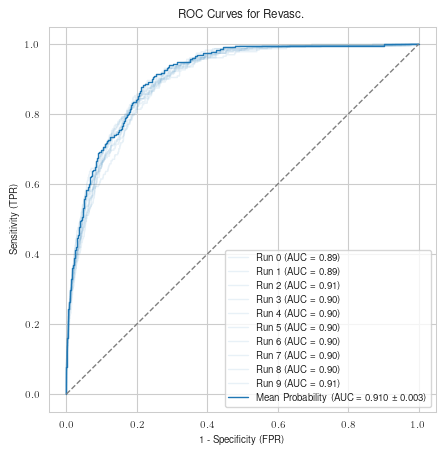

AUC for Mean Probability: 0.910
95% Confidence Interval for AUC of Mean Probability: [0.907, 0.913]


In [5]:
# Initialize lists to store AUCs
auc_scores = []

# Initialize the plot
plt.figure(figsize=(5, 5))

# Plot ROC curves for each run
for i in range(0, 10):
    prob_col = f'proba_run{i}'
    y_true = data['y_true']
    y_prob = data[prob_col]

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

    plt.plot(fpr, tpr, label=f'Run {i} (AUC = {roc_auc:.2f})', color='tab:blue', alpha=0.1)

y_true = data['y_true']
y_prob = data['mean_probability']

fpr_mean, tpr_mean, _ = roc_curve(y_true, y_prob)
roc_auc_mean = auc(fpr_mean, tpr_mean)

# Calculate the 95% confidence interval for the mean probability AUC using the t-distribution
auc_scores = np.array(auc_scores)
n = len(auc_scores)
df = n - 1  # Degrees of freedom
confidence = 0.95
alpha = 1 - confidence

# Calculate the critical t-value
t_value = t.ppf(1 - alpha / 2, df)

std_auc = np.std(auc_scores, ddof=1)
se_auc = std_auc / np.sqrt(n)
ci_margin = t_value * se_auc
ci_lower = roc_auc_mean - ci_margin
ci_upper = roc_auc_mean + ci_margin

plt.plot(fpr_mean, tpr_mean, color='tab:blue', linestyle='-',
         label=f'Mean Probability (AUC = {roc_auc_mean:.3f} ± {ci_margin:.3f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey')

plt.xlabel('1 - Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.title('ROC Curves for Revasc.')
plt.legend(loc='lower right')

plt.xticks(np.arange(0, 1.2, 0.2))
plt.yticks(np.arange(0, 1.2, 0.2))

plt.show()

print(f'AUC for Mean Probability: {roc_auc_mean:.3f}')
print(f'95% Confidence Interval for AUC of Mean Probability: [{ci_lower:.3f}, {ci_upper:.3f}]')

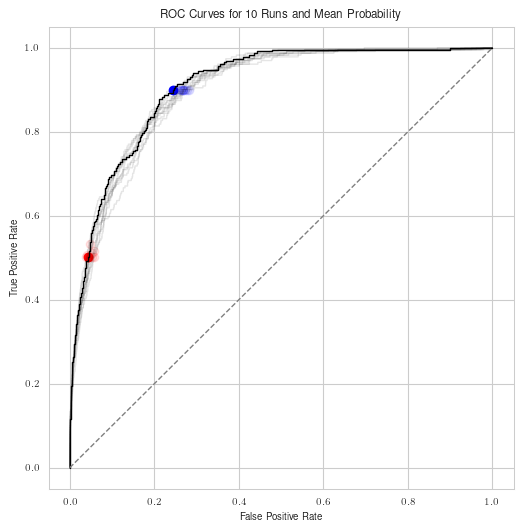

Run 0 - Rule-in Threshold: 0.0254, Rule-out Threshold: 0.0048
Run 1 - Rule-in Threshold: 0.0228, Rule-out Threshold: 0.0035
Run 2 - Rule-in Threshold: 0.0293, Rule-out Threshold: 0.0029
Run 3 - Rule-in Threshold: 0.0275, Rule-out Threshold: 0.0027
Run 4 - Rule-in Threshold: 0.0350, Rule-out Threshold: 0.0035
Run 5 - Rule-in Threshold: 0.0252, Rule-out Threshold: 0.0031
Run 6 - Rule-in Threshold: 0.0290, Rule-out Threshold: 0.0030
Run 7 - Rule-in Threshold: 0.0187, Rule-out Threshold: 0.0025
Run 8 - Rule-in Threshold: 0.0237, Rule-out Threshold: 0.0032
Run 9 - Rule-in Threshold: 0.0237, Rule-out Threshold: 0.0028
Rule-in Threshold for Mean Probability: 0.02719803, 95% CI: [0.02457103, 0.02982504]
Rule-out Threshold for Mean Probability: 0.00432380, 95% CI: [0.00393520, 0.00471240]
Run 0 - Rule-in: Sensitivity: 0.5108, Specificity: 0.9468, PPV: 0.0584, NPV: 0.9967, F1: 0.1048
Run 0 - Rule-out: Sensitivity: 0.9004, Specificity: 0.7376, PPV: 0.0217, NPV: 0.9991, F1: 0.0423
Run 1 - Rule-in:

In [6]:
rule_in_thresholds = []
rule_out_thresholds = []
roc_aucs = []

plt.figure(figsize=(6, 6))

for i in range(0, 10):
    prob_col = f'proba_run{i}'
    y_true = data['y_true']
    y_prob = data[prob_col]

    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_aucs.append(roc_auc)
    precision, recall, pr_thresholds = precision_recall_curve(y_true, y_prob)

    # Find the "rule-in" threshold: maximum PPV with sensitivity >= 50%
    valid_indices = np.where(recall >= 0.5)[0]
    rule_in_index = valid_indices[np.argmax(precision[valid_indices])]
    rule_in_threshold = pr_thresholds[rule_in_index]
    rule_in_thresholds.append(rule_in_threshold)

    # Find the "rule-out" threshold: maximum specificity with sensitivity > 90%
    valid_indices = np.where(tpr >= 0.9)[0]
    rule_out_index = valid_indices[np.argmax(1 - fpr[valid_indices])]
    rule_out_threshold = thresholds[rule_out_index]
    rule_out_thresholds.append(rule_out_threshold)

    plt.plot(fpr, tpr, label=f'Run {i} (Rule-in: {rule_in_threshold:.4f}, Rule-out: {rule_out_threshold:.4f})', color='black', alpha=0.1)

    closest_threshold_index = np.argmin(np.abs(thresholds - rule_in_threshold))
    plt.scatter(fpr[closest_threshold_index], tpr[closest_threshold_index], marker='o', color='red', alpha=0.1)
    
    plt.scatter(fpr[rule_out_index], tpr[rule_out_index], marker='o', color='blue', alpha=0.1)
    
y_true = data['y_true']
y_prob = data['mean_probability']

fpr_mean, tpr_mean, thresholds_mean = roc_curve(y_true, y_prob)
roc_auc_mean = auc(fpr_mean, tpr_mean)

precision_mean, recall_mean, pr_thresholds_mean = precision_recall_curve(y_true, y_prob)

valid_indices_mean = np.where(recall_mean >= 0.5)[0]
rule_in_index_mean = valid_indices_mean[np.argmax(precision_mean[valid_indices_mean])]
rule_in_threshold_mean = pr_thresholds_mean[rule_in_index_mean]

closest_threshold_index_mean_in = np.argmin(np.abs(thresholds_mean - rule_in_threshold_mean))

valid_indices_mean = np.where(tpr_mean >= 0.9)[0]
rule_out_index_mean = valid_indices_mean[np.argmax(1 - fpr_mean[valid_indices_mean])]
rule_out_threshold_mean = thresholds_mean[rule_out_index_mean]

rule_in_thresholds = np.array(rule_in_thresholds)
rule_out_thresholds = np.array(rule_out_thresholds)

mean_rule_in_threshold = np.mean(rule_in_thresholds)
std_rule_in_threshold = np.std(rule_in_thresholds)
ci_margin_in = 1.96 * (std_rule_in_threshold / np.sqrt(len(rule_in_thresholds)))
ci_lower_in = rule_in_threshold_mean - ci_margin_in
ci_upper_in = rule_in_threshold_mean + ci_margin_in

mean_rule_out_threshold = np.mean(rule_out_thresholds)
std_rule_out_threshold = np.std(rule_out_thresholds)
ci_margin_out = 1.96 * (std_rule_out_threshold / np.sqrt(len(rule_out_thresholds)))
ci_lower_out = rule_out_threshold_mean - ci_margin_out
ci_upper_out = rule_out_threshold_mean + ci_margin_out

plt.plot(fpr_mean, tpr_mean, color='black', linestyle='-', 
         label=f'Mean Probability (Rule-in: {rule_in_threshold_mean:.4f} ± {ci_margin_in:.4f}, Rule-out: {rule_out_threshold_mean:.4f} ± {ci_margin_out:.4f})')

plt.scatter(fpr_mean[closest_threshold_index_mean_in], tpr_mean[closest_threshold_index_mean_in], marker='o', color='red')
plt.scatter(fpr_mean[rule_out_index_mean], tpr_mean[rule_out_index_mean], marker='o', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for 10 Runs and Mean Probability')
#plt.legend(loc='lower right')
plt.show()

# Print the rule-in and rule-out thresholds for each run and the mean probability
for i, (rule_in, rule_out) in enumerate(zip(rule_in_thresholds, rule_out_thresholds)):
    print(f'Run {i} - Rule-in Threshold: {rule_in:.4f}, Rule-out Threshold: {rule_out:.4f}')
print(f'Rule-in Threshold for Mean Probability: {rule_in_threshold_mean:.8f}, 95% CI: [{ci_lower_in:.8f}, {ci_upper_in:.8f}]')
print(f'Rule-out Threshold for Mean Probability: {rule_out_threshold_mean:.8f}, 95% CI: [{ci_lower_out:.8f}, {ci_upper_out:.8f}]')

# Calculate and print specificity, sensitivity, NPV, PPV, and F1 score for rule-in and rule-out thresholds for all runs and mean probability
def calculate_metrics(y_true, y_prob, threshold):
    y_pred = y_prob >= threshold
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity) if (ppv + sensitivity) > 0 else 0
    return sensitivity, specificity, ppv, npv, f1

metrics_in = []
metrics_out = []

for i in range(0, 10):
    prob_col = f'proba_run{i}'
    y_true = data['y_true']
    y_prob = data[prob_col]

    sensitivity_in, specificity_in, ppv_in, npv_in, f1_in = calculate_metrics(y_true, y_prob, rule_in_thresholds[i])
    sensitivity_out, specificity_out, ppv_out, npv_out, f1_out = calculate_metrics(y_true, y_prob, rule_out_thresholds[i])

    metrics_in.append([sensitivity_in, specificity_in, ppv_in, npv_in, f1_in])
    metrics_out.append([sensitivity_out, specificity_out, ppv_out, npv_out, f1_out])

    print(f'Run {i} - Rule-in: Sensitivity: {sensitivity_in:.4f}, Specificity: {specificity_in:.4f}, PPV: {ppv_in:.4f}, NPV: {npv_in:.4f}, F1: {f1_in:.4f}')
    print(f'Run {i} - Rule-out: Sensitivity: {sensitivity_out:.4f}, Specificity: {specificity_out:.4f}, PPV: {ppv_out:.4f}, NPV: {npv_out:.4f}, F1: {f1_out:.4f}')

sensitivity_in_mean, specificity_in_mean, ppv_in_mean, npv_in_mean, f1_in_mean = calculate_metrics(data['y_true'], data['mean_probability'], rule_in_threshold_mean)
sensitivity_out_mean, specificity_out_mean, ppv_out_mean, npv_out_mean, f1_out_mean = calculate_metrics(data['y_true'], data['mean_probability'], rule_out_threshold_mean)

# Convert metrics to numpy arrays
metrics_in = np.array(metrics_in)
metrics_out = np.array(metrics_out)

# Calculate 95% confidence intervals for metrics of mean probability
def calculate_ci(metrics, mean_metric):
    std_metric = np.std(metrics)
    ci_margin = 1.96 * (std_metric / np.sqrt(len(metrics)))
    ci_lower = mean_metric - ci_margin
    ci_upper = mean_metric + ci_margin
    return mean_metric, ci_lower, ci_upper

# Calculate and print 95% confidence intervals for rule-in metrics
sensitivity_in_ci = calculate_ci(metrics_in[:, 0], sensitivity_in_mean)
specificity_in_ci = calculate_ci(metrics_in[:, 1], specificity_in_mean)
ppv_in_ci = calculate_ci(metrics_in[:, 2], ppv_in_mean)
npv_in_ci = calculate_ci(metrics_in[:, 3], npv_in_mean)
f1_in_ci = calculate_ci(metrics_in[:, 4], f1_in_mean)

print(f'Mean Probability - Rule-in: Sensitivity: {sensitivity_in_mean:.4f} (95% CI: [{sensitivity_in_ci[1]:.4f}, {sensitivity_in_ci[2]:.4f}]), Specificity: {specificity_in_mean:.4f} (95% CI: [{specificity_in_ci[1]:.4f}, {specificity_in_ci[2]:.4f}]), PPV: {ppv_in_mean:.4f} (95% CI: [{ppv_in_ci[1]:.4f}, {ppv_in_ci[2]:.4f}]), NPV: {npv_in_mean:.4f} (95% CI: [{npv_in_ci[1]:.4f}, {npv_in_ci[2]:.4f}]), F1: {f1_in_mean:.4f} (95% CI: [{f1_in_ci[1]:.4f}, {f1_in_ci[2]:.4f}])')

# Calculate and print 95% confidence intervals for rule-out metrics
sensitivity_out_ci = calculate_ci(metrics_out[:, 0], sensitivity_out_mean)
specificity_out_ci = calculate_ci(metrics_out[:, 1], specificity_out_mean)
ppv_out_ci = calculate_ci(metrics_out[:, 2], ppv_out_mean)
npv_out_ci = calculate_ci(metrics_out[:, 3], npv_out_mean)
f1_out_ci = calculate_ci(metrics_out[:, 4], f1_out_mean)

print(f'Mean Probability - Rule-out: Sensitivity: {sensitivity_out_mean:.4f} (95% CI: [{sensitivity_out_ci[1]:.4f}, {sensitivity_out_ci[2]:.4f}]), Specificity: {specificity_out_mean:.4f} (95% CI: [{specificity_out_ci[1]:.4f}, {specificity_out_ci[2]:.4f}]), PPV: {ppv_out_mean:.4f} (95% CI: [{ppv_out_ci[1]:.4f}, {ppv_out_ci[2]:.4f}]), NPV: {npv_out_mean:.4f} (95% CI: [{npv_out_ci[1]:.4f}, {npv_out_ci[2]:.4f}]), F1: {f1_out_mean:.4f} (95% CI: [{f1_out_ci[1]:.4f}, {f1_out_ci[2]:.4f}])')

In [7]:
high_risk = data[data['mean_probability'] >= rule_in_threshold_mean].shape[0]
low_risk = data[data['mean_probability'] < rule_out_threshold_mean].shape[0]
intermediate_risk = data[(data['mean_probability'] < rule_in_threshold_mean) & (data['mean_probability'] > rule_out_threshold_mean)].shape[0]

print(f'Number of patients in high risk group: {high_risk}')
print(f'Number of patients in intermediate risk group: {intermediate_risk}')
print(f'Number of patients in low risk group: {low_risk}')

Number of patients in high risk group: 1688
Number of patients in intermediate risk group: 7242
Number of patients in low risk group: 27064


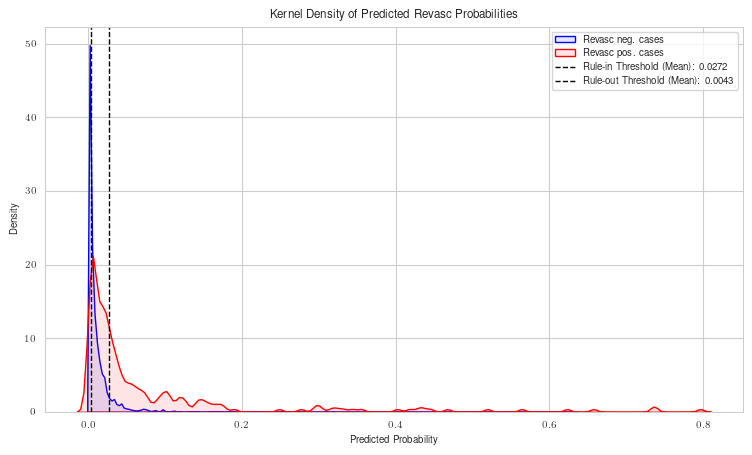

In [8]:
plt.figure(figsize=(9, 5))

true_outcome_0 = data[data['y_true'] == 0]
true_outcome_1 = data[data['y_true'] == 1]

sns.kdeplot(true_outcome_0['mean_probability'], fill=True, color='blue', label='Revasc neg. cases', alpha=.1, bw_adjust=.1) #, clip=(0, None)

sns.kdeplot(true_outcome_1['mean_probability'], fill=True, color='red', label='Revasc pos. cases', alpha=.1, bw_adjust=.1) #, clip=(0, None)

# Plot mean probability thresholds
plt.axvline(x=rule_in_threshold_mean, color='black', linestyle='--', alpha=1, label=f'Rule-in Threshold (Mean): {rule_in_threshold_mean:.4f}')
plt.axvline(x=rule_out_threshold_mean, color='black', linestyle='--', alpha=1, label=f'Rule-out Threshold (Mean): {rule_out_threshold_mean:.4f}')

plt.title('Kernel Density of Predicted Revasc Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.legend()

plt.show()